In [3]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [4]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from train import train
from train import train_rnis
# from models_new import Renorm_Dynamic
# from models_new import Rnis_Dynamic
from train import count_parameters
from dynamic_models_sis_new import Simple_Spring_Model
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [5]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) 
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)

# Train RNIS

In [6]:
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 30001
hidden_units_dyn = 32
eis_rnis, term1s_rnis, term2s_rnis, losses_rnis, MAEs_mstep_rnis, net_rnis = train(train_data=train_data, test_data=test_data, 
                                                                                    sz=sz, scale=scale, mae2_w=mae2_w, T2=T_total,
                                                                                    T1 = 3001, sigma=sigma, rou=rou, dt=dt, 
                                                                                    L=L, hidden_units_dyn = hidden_units_dyn,
                                                                                    framework = 'rnis')

30876
check point-------o_0-> 08:52:59.982570; lasting 0:04:21.043019 seconds
Epoch: 0
Train loss: 0.4831
dEI: 0.6940
term1: 0.0044
term2: 1.3837
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 08:53:01.993647; lasting 0:00:02.011077 seconds
check point-------o_0-> 08:53:15.478218; lasting 0:00:13.484571 seconds
Epoch: 500
Train loss: 0.0559
dEI: 1.2012
term1: 0.9158
term2: 1.4865
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 08:53:17.115871; lasting 0:00:01.637653 seconds
check point-------o_0-> 08:53:29.103867; lasting 0:00:11.987996 seconds
Epoch: 1000
Train loss: 0.0358
dEI: 1.4960
term1: 1.4697
term2: 1.5222
Test multistep loss: 0.0000
---------------------------------------------------------------------------------------------------

# Train NIS

In [7]:
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 30001
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis, net_nis = train(train_data=train_data, test_data=test_data, 
                                                                    sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                    mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis')

32922
check point-------o_0-> 09:11:59.033918; lasting 0:00:00.044545 seconds
Epoch: 0
Train loss: 0.5128
dEI: 0.3536
term1: -0.5989
term2: 1.3062
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 09:12:00.579870; lasting 0:00:01.545952 seconds
check point-------o_0-> 09:12:15.117964; lasting 0:00:14.538094 seconds
Epoch: 500
Train loss: 0.0595
dEI: 0.9852
term1: 0.5273
term2: 1.4431
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 09:12:16.281521; lasting 0:00:01.163557 seconds
check point-------o_0-> 09:12:30.608021; lasting 0:00:14.326500 seconds
Epoch: 1000
Train loss: 0.0359
dEI: 1.3286
term1: 1.1738
term2: 1.4833
Test multistep loss: 0.0000
--------------------------------------------------------------------------------------------------

# Train NIS+

In [8]:
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net_nisp = train(train_data=train_data, test_data=test_data, 
                                                                         sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                         mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis+')

37404
check point-------o_0-> 09:27:58.473937; lasting 0:00:00.044628 seconds
Epoch: 0
Train loss: 0.4452
dEI: 0.3718
term1: -0.6102
term2: 1.3537
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 09:28:00.181715; lasting 0:00:01.707778 seconds
check point-------o_0-> 09:28:14.818908; lasting 0:00:14.637193 seconds
Epoch: 500
Train loss: 0.0523
dEI: 1.0695
term1: 0.7150
term2: 1.4240
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 09:28:16.534303; lasting 0:00:01.715395 seconds
check point-------o_0-> 09:28:31.139911; lasting 0:00:14.605608 seconds
Epoch: 1000
Train loss: 0.0346
dEI: 1.4048
term1: 1.3622
term2: 1.4474
Test multistep loss: 0.0000
--------------------------------------------------------------------------------------------------

# Results

In [9]:
print(count_parameters(net_rnis),count_parameters(net_nis),count_parameters(net_nisp))

30876 32922 37404


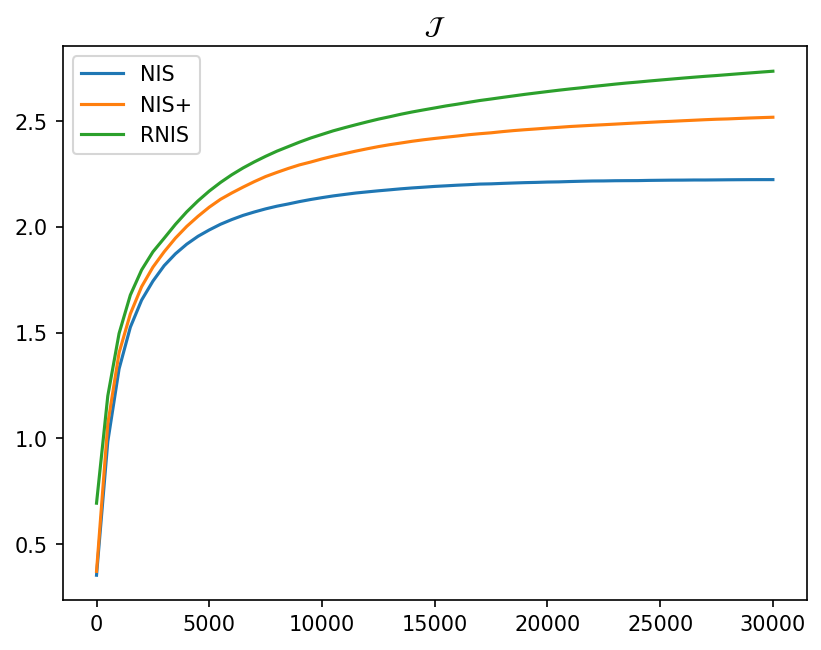

In [10]:
plt.figure(dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.plot(timeseries, eis_rnis, label='RNIS')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

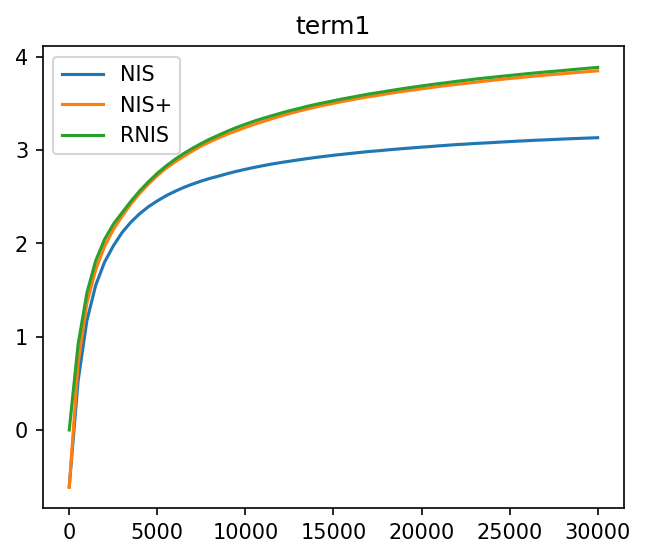

In [11]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, term1s_nis, label='NIS')
plt.plot(timeseries, term1s_nisp, label='NIS+')
plt.plot(timeseries, term1s_rnis, label='RNIS')
plt.title(r'term1')
plt.legend()
# plt.yscale('log')
plt.show()

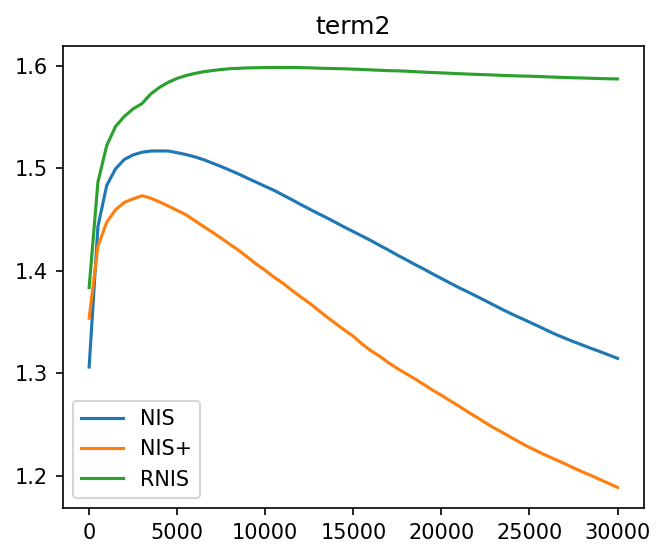

In [12]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, term2s_nis, label='NIS')
plt.plot(timeseries, term2s_nisp, label='NIS+')
plt.plot(timeseries, term2s_rnis, label='RNIS')
plt.title(r'term2')
plt.legend()
# plt.yscale('log')
plt.show()

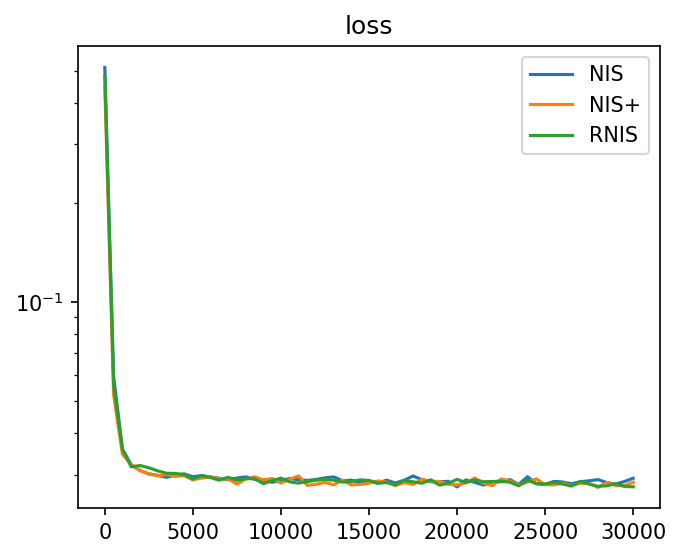

In [13]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.plot(timeseries, losses_rnis, label='RNIS')
plt.title(r'loss')
plt.legend()
plt.yscale('log')
plt.show()

/tmp/ipykernel_3173437/593287263.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


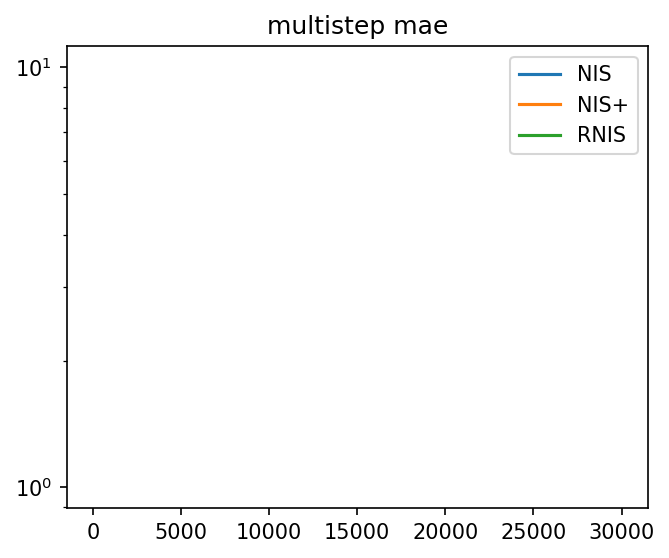

In [11]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, MAEs_mstep_nis, label='NIS')
plt.plot(timeseries, MAEs_mstep_nisp, label='NIS+')
plt.plot(timeseries, MAEs_mstep_rnis, label='RNIS')
plt.title(r'multistep mae')
plt.legend()
plt.yscale('log')
plt.show()

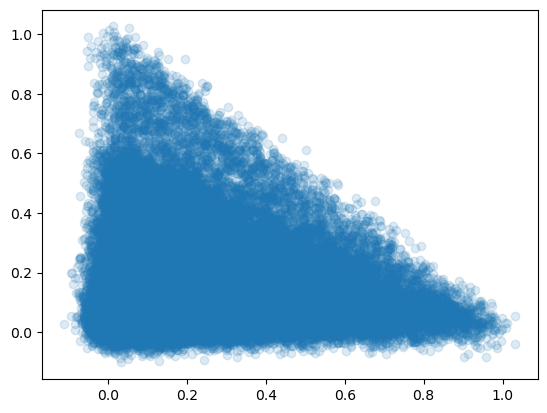

In [12]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
interval = 100
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
ss,_,_,_ = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps*interval, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt, interval=interval)
plt.scatter(ss[:,0].cpu().numpy(),ss[:,1].cpu().numpy(),alpha=0.15)